Start By Importing all th needed libraries for this project.

In [1]:
# import the needed pacages for the training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


2024-10-19 12:51:26.371117: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Paths 
Set the path for the data.

In [8]:
train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'

# Data Augmentation and Preprocessing
Make sure to set the parameters for the data augmentation for the training.

In [10]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# scale the images

In [11]:
# scale the images
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Train Images
Load the train images with the resize and batch size, also with the class mode as binary. 


In [12]:
# Load images from train images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


# load the Validation Data 


In [13]:
# get the valdation images
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


# load test images


In [14]:
# get the testing images loaded in to the system'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


# load the Pre Trained Model (VGG16) 
Load the Pre Trained Model. Make sure to exclude the last layer. of the model.


In [15]:
# Load VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


# Add the new layers and compile the model
Add the new layers for fine-tuning, and compile the model. This will take a few minutes and it allows us to fine-tune our model to achieve better results and accuracy.



In [16]:
# layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [17]:
#  final model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model and fit the model


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    verbose=1
)

/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8097 - loss: 0.3948

/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 998s 6s/step - accuracy: 0.8100 - loss: 0.3942 - val_accuracy: 0.7500 - val_loss: 0.4136
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 927s 6s/step - accuracy: 0.9166 - loss: 0.2146 - val_accuracy: 0.7500 - val_loss: 0.7537


# InceptionNet Implementation:
We repeat the same steps for InceptionNet and EfficientNet.



In [19]:
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model_inceptionv3.layers:
    layer.trainable = False


# layers for fine-tuning
x = base_model_inceptionv3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)


#  final model inception
model_inception = Model(inputs=base_model_inceptionv3.input, outputs=predictions)

# Compile the model
model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    verbose=1
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step
Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7944 - loss: 0.7525 - val_accuracy: 0.9375 - val_loss: 0.2699
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9149 - loss: 0.2137 - val_accuracy: 0.8750 - val_loss: 0.2378


# EfficientNet Implementation:

This function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

In [20]:
# Load EfficientNet without the top layers
base_model_efficientNet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# layers for fine-tuning
x = base_model_efficientNet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

#  final model
model_efficientNet = Model(inputs=base_model_efficientNet.input, outputs=predictions)

# Compile the model
model_efficientNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_efficientNet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    verbose=1
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 932s 6s/step - accuracy: 0.9290 - loss: 0.1760 - val_accuracy: 0.7500 - val_loss: 0.5064
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1059s 6s/step - accuracy: 0.9385 - loss: 0.1675 - val_accuracy: 0.7500 - val_loss: 0.7025


# Model Evaluation

### Evaluate on Test Set:

The models will be evaluated in the follwoing order
- Vgg16
- InceptionNet
- EfficientNet

In [21]:
# Evaluating he Vgg16 Model first

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy VGG16 Mode:  {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 121s 6s/step - accuracy: 0.8587 - loss: 0.4143
Test Accuracy VGG16 Mode:  0.8734, Test Loss: 0.3700


In [22]:
# Evaluating the InceptionNet
test_loss, test_accuracy = model_inception.evaluate(test_generator)
print(f"Test Accuracy InceptionNet Model: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8526 - loss: 0.3510
Test Accuracy InceptionNet Model: 0.8365, Test Loss: 0.3727


In [23]:
# Evaluating the EfficientNet
test_loss, test_accuracy = model_efficientNet.evaluate(test_generator)
print(f"Test Accuracy EfficientNet Model: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3573 - loss: 0.7324
Test Accuracy EfficientNet Model: 0.3750, Test Loss: 0.7283


## Detailed Performance Metrics


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [25]:
# Predict on test data Vgg16
test_preds = model.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 132s 7s/step
              precision    recall  f1-score   support

      Normal       0.38      0.27      0.32       234
   Pneumonia       0.63      0.74      0.68       390

    accuracy                           0.56       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.54      0.56      0.54       624



In [26]:
# Predict on test data InceptionNet

test_preds = model_inception.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step
              precision    recall  f1-score   support

      Normal       0.39      0.34      0.36       234
   Pneumonia       0.63      0.68      0.66       390

    accuracy                           0.55       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.55      0.55       624



In [27]:
# Predict on test data EfficientNet
test_preds = model_efficientNet.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step
              precision    recall  f1-score   support

      Normal       0.38      1.00      0.55       234
   Pneumonia       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## Results Visualization

Here i will be able to visualize the Plotting Training History of each model starting with

- Vgg16
- InceptionNet
- EfficientNet

1. VGG16

Matplotlib is building the font cache; this may take a moment.


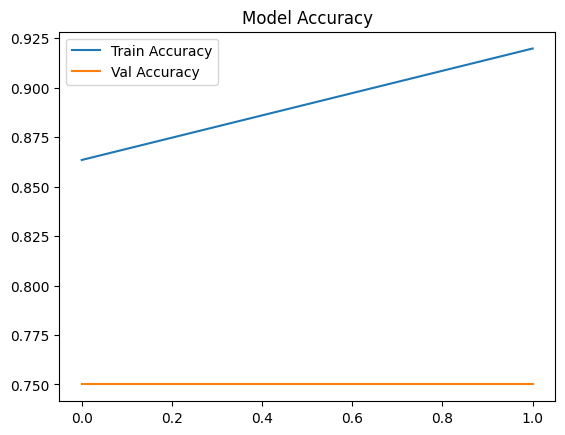

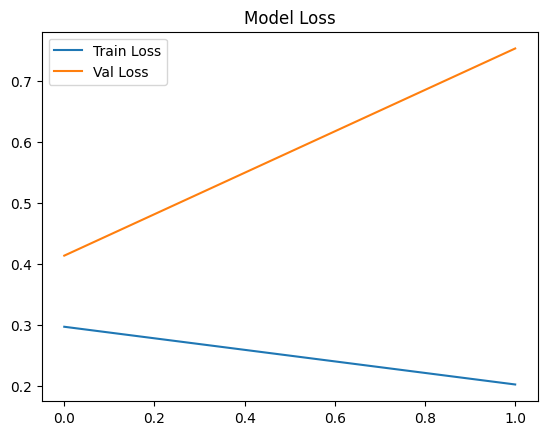

In [28]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

2. InceptionNet


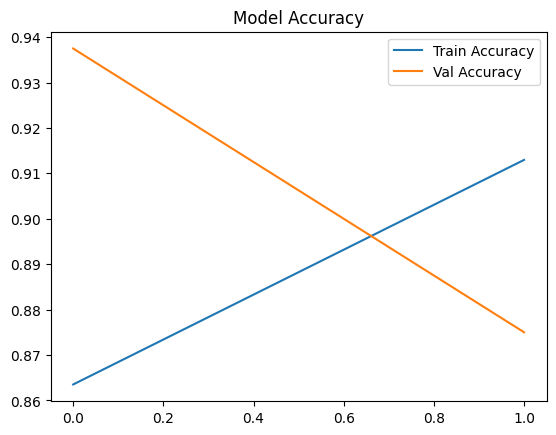

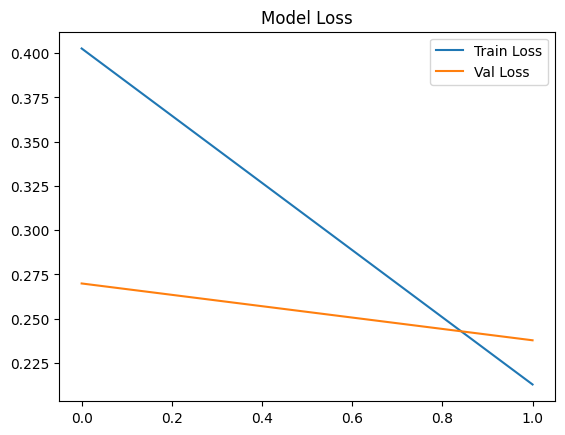

In [29]:
# Plot accuracy
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

3 - EfficientNet



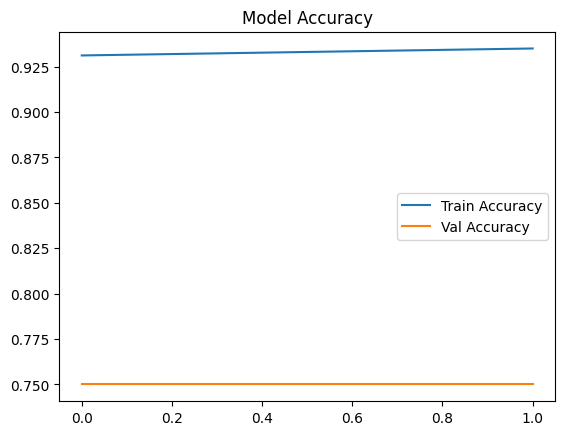

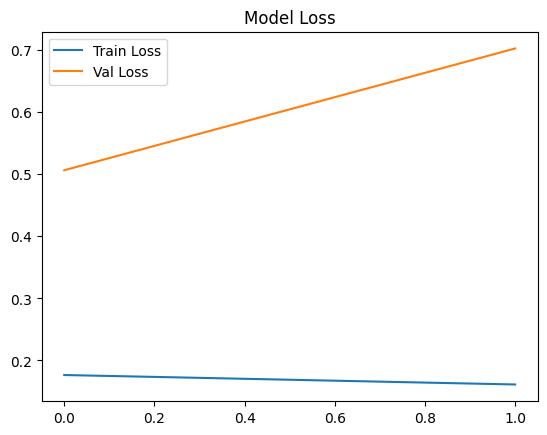

In [30]:
# Plot accuracy
plt.plot(history_efficientNet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientNet.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history_efficientNet.history['loss'], label='Train Loss')
plt.plot(history_efficientNet.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()